### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [1]:
import pandas as pd

In [7]:
import pandas as pd


df = pd.read_csv('data.csv', sep=',')

df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

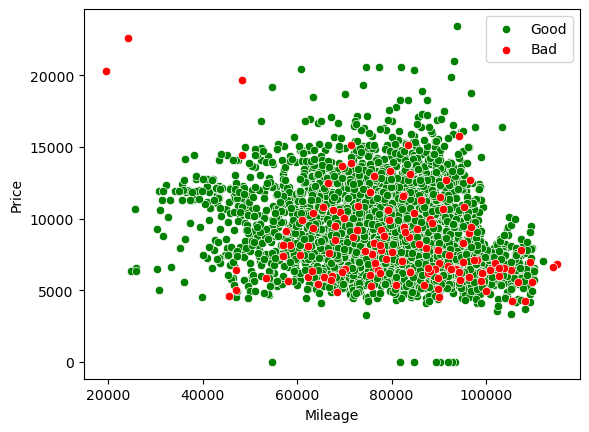

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


df.dropna(inplace=True)
good_cars = df[df['IsBadBuy'] == 0]
bad_cars = df[df['IsBadBuy'] == 1]


sns.scatterplot(data=good_cars, x='VehOdo', y='MMRCurrentRetailAveragePrice', color='green', label='Good')
sns.scatterplot(data=bad_cars, x='VehOdo', y='MMRCurrentRetailAveragePrice', color='red', label='Bad')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


In [9]:
# место для кода

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [63]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# загрузить данные из csv-файла в DataFrame
data = pd.read_csv('data.csv')

# выбрать признаки и целевую переменную
X = data[['VehOdo', 'MMRCurrentRetailAveragePrice']]
y = data['IsBadBuy']

# удалить строки, содержащие пропущенные значения
X = X.loc[pd.notnull(X).all(axis=1)]
y = y.loc[X.index]

# создать экземпляр класса LinearRegression и натренировать модель
model = LinearRegression()
model.fit(X, y)

LinearRegression()

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
prediction = model.predict(X_train)
prediction

array([0.14601163, 0.1560514 , 0.21102344, ..., 0.14349868, 0.08755092,
       0.14700893])

## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [16]:
threshold = 0.5
prediction_binary = [1 if x >= threshold else 0 for x in prediction]
prediction_binary

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [23]:


threshold = 0.3
y_pred = (prediction > threshold).astype(int)

# Выводим отчет по качеству классификации
print(metrics.classification_report(y_train, y_pred,zero_division=1))

# Выводим матрицу ошибок
print(metrics.confusion_matrix(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     50986
           1       1.00      0.00      0.00      7148

    accuracy                           0.88     58134
   macro avg       0.94      0.50      0.47     58134
weighted avg       0.89      0.88      0.82     58134

[[50986     0]
 [ 7148     0]]


# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [65]:
from sklearn.tree import DecisionTreeClassifier

# Создание объекта классификатора решающего дерева
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train, y_train)

# Получение предсказаний на тестовых данных и преобразование в бинарные метки
tree_preds = tree.predict(X_test)


## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [45]:
tree_preds = (tree_probs > 0.5).astype(int)
# Вывод отчета о классификации
print(metrics.classification_report(y_test, tree_preds))

# Вывод матрицы ошибок
print(metrics.confusion_matrix(y_test, tree_preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     12738
           1       0.18      0.07      0.10      1796

    accuracy                           0.85     14534
   macro avg       0.53      0.51      0.51     14534
weighted avg       0.79      0.85      0.82     14534

[[12207   531]
 [ 1676   120]]


## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [46]:
print(metrics.classification_report(y_test, tree_preds))

print(metrics.confusion_matrix(y_test, tree_preds))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92     12738
           1       0.18      0.07      0.10      1796

    accuracy                           0.85     14534
   macro avg       0.53      0.51      0.51     14534
weighted avg       0.79      0.85      0.82     14534

[[12207   531]
 [ 1676   120]]


# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [47]:
dataTrain = data.loc[0:34999, :]
dataTest = data.loc[35000:69999, :]

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [71]:
# Преобразование колонки PurchDate в формат даты и извлечение признаков Year, Month, Day
data=pd.read_csv('data.csv')
data.dropna(inplace=True)
data['PurchDate'] = pd.to_datetime(data['PurchDate'])
data['Year'] = data['PurchDate'].dt.year
data['Month'] = data['PurchDate'].dt.month
data['Day'] = data['PurchDate'].dt.day

# Удаление колонки PurchDate
data = data.drop(['PurchDate'], axis=1)

# Разделение на обучающую и тестовую выборки
dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]

categorical_features = ['Auction', 'Transmission', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'VNST', 'IsOnlineSale']

# One-Hot Encoding
dataTrain = pd.get_dummies(dataTrain, columns=categorical_features)
dataTest = pd.get_dummies(dataTest, columns=categorical_features)

# Удаление ненужных столбцов
train_features = dataTrain[features]
train_target = dataTrain['IsBadBuy']

test_features = dataTest[features]
test_target = dataTest['IsBadBuy']

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(train_features, train_target)

train_predictions = tree.predict(train_features)
train_accuracy = accuracy_score(train_target, train_predictions)

test_predictions = tree.predict(test_features)
test_accuracy = accuracy_score(test_target, test_predictions)

NameError: name 'accuracy_score' is not defined

# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [72]:
data=pd.read_csv('data.csv')
data.dropna(inplace=True)
X = data[['VehOdo', 'MMRCurrentRetailAveragePrice']]
y = data['IsBadBuy']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train, y_train)

# Получение предсказаний на тестовых данных и преобразование в бинарные метки
tree_preds = tree.predict(X_test)
features=['VehOdo', 'MMRCurrentRetailAveragePrice']
y_pred_train = tree.predict(data[features])
import numpy as np

loss = np.mean((data['IsBadBuy'] == 0) * 1000 * (y_pred_train == 1) + 
               (data['IsBadBuy'] == 1) * 100 * (y_pred_train == 0))
print(loss)

5.0366300366300365
